In [1]:
# on fait des installatiosn des bibliothèques nécessaire avec pip install
# on fait une importation de nos bibliothèques
import gensim # traitement des corpus
from gensim.models import Word2Vec # formation des modèles word2vec
from sklearn.metrics.pairwise import cosine_similarity #calcule la similarité entre deux vecteurs
import matplotlib.pyplot as plt #traçage des figures et courbes
from sklearn.decomposition import PCA #réduction des dimensions des données
from gensim.models import KeyedVectors #manipulation des vecteurs 

# 1)
#on a une liste tokonisée (le text est divisé en des mots)
liste = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
['this', 'is', 'the', 'second', 'sentence'],
['yet', 'another', 'sentence'],
['one', 'more', 'sentence'],
['and', 'the', 'final', 'sentence']]

# On va générer les embeddings des mots contenus dans ce texte avec CBOW et Skip-gram
# modèle Word2Vec avec CBOW
model_CBOW = Word2Vec(liste, vector_size=10, window=5, min_count=1, sg=0)
words_CBOW = list(model_CBOW.wv.key_to_index)
print("words_CBOW: \n",words_CBOW)

#modèle Word2vec avec skip-gram
model_skipgram = Word2Vec(liste, vector_size=10, window=5, min_count=1,sg=1)
words_skipgram = list(model_skipgram.wv.key_to_index)
print("words_skipgram: \n",words_skipgram)




words_CBOW: 
 ['sentence', 'the', 'is', 'this', 'final', 'and', 'more', 'one', 'another', 'yet', 'second', 'word2vec', 'for', 'first']
words_skipgram: 
 ['sentence', 'the', 'is', 'this', 'final', 'and', 'more', 'one', 'another', 'yet', 'second', 'word2vec', 'for', 'first']


In [2]:
# Construction du vocabulaire pour cbow
model_CBOW.build_vocab(liste)

# Construction du vocabulaire pour skipgram
model_skipgram.build_vocab(liste)

# Entraînement du modèle cbow 
model_CBOW.train(liste, total_examples=model_CBOW.corpus_count, epochs=10)

# Entraînement du modèle skipgram 
model_skipgram.train(liste, total_examples=model_skipgram.corpus_count, epochs=10)


(27, 220)

In [3]:
#2) a) Embedding du mot another
# avec cbow
embedding1 = model_CBOW.wv['another']
print("Embedding  du mot another avec cbow : \n",embedding1)

# avec skipgram
embedding2 = model_skipgram.wv['another']
print("Embedding  du mot another avec skipgram : \n", embedding2)

Embedding  du mot another avec cbow : 
 [ 0.01631471  0.00190235  0.03474415  0.00218555  0.09618734  0.05061083
 -0.08917218 -0.0704247   0.00901168  0.06393624]
Embedding  du mot another avec skipgram : 
 [ 0.01631517  0.00190084  0.03474126  0.00218178  0.09619039  0.05060984
 -0.08917545 -0.07042213  0.00901334  0.0639326 ]


In [4]:
#b)calcule de la similarité  Pour Cbow
# entre les 2 mots "word2vec" et "another"
similarity_cbow_another = model_CBOW.wv.similarity('word2vec', 'another')
print("Pour CBOW, la similarité entre les mots word2vec et another  :", similarity_cbow_another)

# entre les 2 mots "word2vec" et "first"
similarity_cbow_first = model_CBOW.wv.similarity('word2vec', 'first')
print("Pour CBOW, la similarité  entre les 2 mots word2vec et first : ", similarity_cbow_first)


Pour CBOW, la similarité entre les mots word2vec et another  : -0.19866976
Pour CBOW, la similarité  entre les 2 mots word2vec et first :  -0.11387495


In [5]:
#b)calcule de la similarité  Pour skipgram
# entre les 2 mots "word2vec" et "another"
similarity_skipgram_another = model_CBOW.wv.similarity('word2vec', 'another')
print("Pour SKIPGRAM, la similarité entre les mots word2vec et another  :", similarity_skipgram_another)

# entre les 2 mots "word2vec" et "first"
similarity_skipgram_first = model_CBOW.wv.similarity('word2vec', 'first')
print("Pour SKIPGRAM, la similarité  entre les 2 mots word2vec et first : ", similarity_skipgram_first)

Pour SKIPGRAM, la similarité entre les mots word2vec et another  : -0.19866976
Pour SKIPGRAM, la similarité  entre les 2 mots word2vec et first :  -0.11387495


In [6]:
#c) les mots les plus similaires à word2vec

# avec cbow
plus_similaire_word2vec_cbow = model_CBOW.wv.most_similar('word2vec')
print("Pour CBOW, les mots les plus similaires à word2vec sont: \n", plus_similaire_word2vec_cbow)


Pour CBOW, les mots les plus similaires à word2vec sont: 
 [('sentence', 0.6143982410430908), ('and', 0.38640597462654114), ('final', 0.2201724797487259), ('second', 0.197344109416008), ('more', 0.11534234881401062), ('for', -0.042645346373319626), ('the', -0.08938948810100555), ('first', -0.11387497931718826), ('is', -0.17998702824115753), ('this', -0.18975558876991272)]


In [7]:
# avec skipgram
plus_similaire_word2vec_skipgram = model_skipgram.wv.most_similar('word2vec')
print(" Pour SKIPGRAM, les mots les plus similaires à word2vec  sont : \n", plus_similaire_word2vec_skipgram)


 Pour SKIPGRAM, les mots les plus similaires à word2vec  sont : 
 [('sentence', 0.614398181438446), ('and', 0.38595545291900635), ('final', 0.22056637704372406), ('second', 0.197344109416008), ('more', 0.11534234881401062), ('for', -0.042645346373319626), ('the', -0.08938972651958466), ('first', -0.11387497931718826), ('is', -0.17998702824115753), ('this', -0.18972058594226837)]


In [8]:
#C) les mots les plus similaires à this
# avec cbow
plus_similaire_this_cbow = model_CBOW.wv.most_similar('this')
print(" Pour CBOW, les mots les plus similaires à this sont : \n", plus_similaire_this_cbow )

 Pour CBOW, les mots les plus similaires à this sont : 
 [('is', 0.5436176061630249), ('one', 0.43180742859840393), ('yet', 0.379301518201828), ('the', 0.30043497681617737), ('more', 0.22743220627307892), ('first', 0.1049535870552063), ('second', -0.13110800087451935), ('word2vec', -0.1897556185722351), ('sentence', -0.22422084212303162), ('final', -0.23739895224571228)]


In [9]:
# avec skipgram
plus_similaire_this_skipgram = model_CBOW.wv.most_similar('this')
print("Pour SKIPGRAM Les mots les plus similaires à this sont: \n", plus_similaire_this_skipgram )

Pour SKIPGRAM Les mots les plus similaires à this sont: 
 [('is', 0.5436176061630249), ('one', 0.43180742859840393), ('yet', 0.379301518201828), ('the', 0.30043497681617737), ('more', 0.22743220627307892), ('first', 0.1049535870552063), ('second', -0.13110800087451935), ('word2vec', -0.1897556185722351), ('sentence', -0.22422084212303162), ('final', -0.23739895224571228)]


In [10]:
#d)Matrice de similarité
#Pour CBOW
vectors1 = [model_CBOW.wv[mot] for mot in words_CBOW]
matrice_de_similarité = cosine_similarity(vectors1)
print("Pour CBOW, la matrice de similarité est : \n ", matrice_de_similarité)

Pour CBOW, la matrice de similarité est : 
  [[ 1.         -0.3208028  -0.53818405 -0.22422084  0.11170702  0.14213069
  -0.06571346  0.02682807  0.04261865 -0.30176383 -0.28786665  0.61439824
   0.24953832 -0.36627138]
 [-0.3208028   1.0000001   0.32936347  0.300435   -0.06321471  0.30014688
  -0.04375133  0.47055006  0.05539995 -0.11288689  0.427315   -0.0893895
  -0.15168385 -0.105497  ]
 [-0.53818405  0.32936347  1.          0.54361755 -0.32143232 -0.5370016
   0.35868835  0.03376541 -0.5145714   0.03525327  0.23243055 -0.17998704
  -0.3820523  -0.21133739]
 [-0.22422084  0.300435    0.54361755  1.         -0.23739895 -0.37953365
   0.22743222  0.4318074  -0.72870946  0.3793015  -0.13110799 -0.1897556
  -0.27261367  0.10495356]
 [ 0.11170702 -0.06321471 -0.32143232 -0.23739895  0.9999999   0.43412143
   0.20961456 -0.44068396  0.07342476 -0.10831     0.07656562  0.22017248
  -0.09990796 -0.19239052]
 [ 0.14213069  0.30014688 -0.5370016  -0.37953365  0.43412143  0.99999994
  -0.1011

In [11]:
#Pour SKIPGRAM
vectors2 = [model_skipgram.wv[mot] for mot in words_skipgram]
matrice_de_similarité = cosine_similarity(vectors2)
print("Pour SKIPGRAM, la matrice de similarité est : \n ", matrice_de_similarité)

Pour SKIPGRAM, la matrice de similarité est : 
  [[ 0.99999994 -0.32081592 -0.53818405 -0.22414795  0.11232167  0.1414483
  -0.06571342  0.02718726  0.04263292 -0.30176383 -0.28786665  0.6143982
   0.2495383  -0.36627138]
 [-0.32081592  0.99999994  0.32938325  0.3004356  -0.06352445  0.30048344
  -0.04377504  0.47041878  0.05541641 -0.11287951  0.42731202 -0.08938974
  -0.1516906  -0.10549209]
 [-0.53818405  0.32938325  1.          0.54357225 -0.3217354  -0.53670233
   0.35868835  0.03357159 -0.5145726   0.03525324  0.23243055 -0.17998704
  -0.3820523  -0.21133739]
 [-0.22414795  0.3004356   0.54357225  0.9999999  -0.2375541  -0.37929782
   0.22743922  0.43176794 -0.72872794  0.3792711  -0.13112015 -0.18972057
  -0.27258673  0.10493289]
 [ 0.11232167 -0.06352445 -0.3217354  -0.2375541   1.0000001   0.43429527
   0.20953187 -0.44070184  0.07346813 -0.10847534  0.07636635  0.22056639
  -0.09976764 -0.19262445]
 [ 0.1414483   0.30048344 -0.53670233 -0.37929782  0.43429527  0.9999999
  -0.

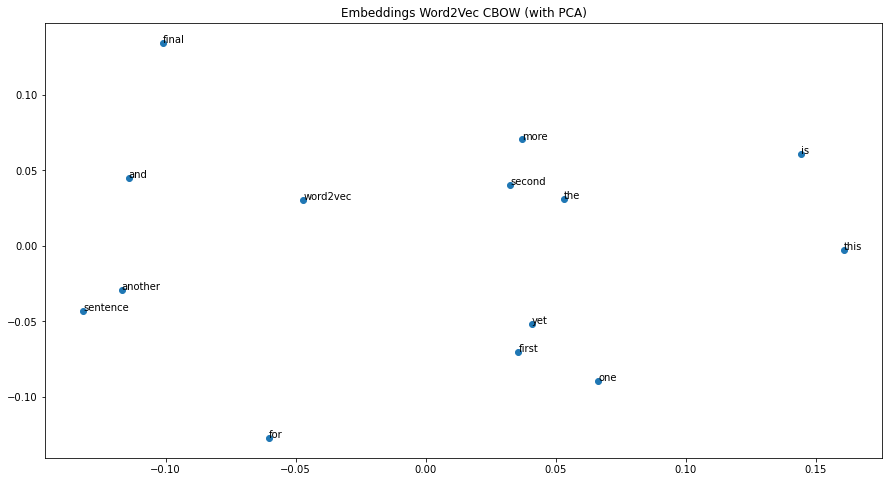

In [12]:
# 3 ) Réduction des dimensions des vecteurs de mot avec la technique ACP pour la visualisation
# avec CBOW
pca = PCA(n_components=2)
embeddings_CBOW_pca = pca.fit_transform(vectors1)

# Tracàge des embeddings réduits en 2 dimensions
plt.figure(figsize=(15, 8))
plt.scatter(embeddings_CBOW_pca[:, 0], embeddings_CBOW_pca[:, 1])
for i, mot in enumerate(words_CBOW):
    plt.annotate(mot, (embeddings_CBOW_pca[i, 0], embeddings_CBOW_pca[i, 1]))
plt.title("Embeddings Word2Vec CBOW (with PCA)")
plt.show()

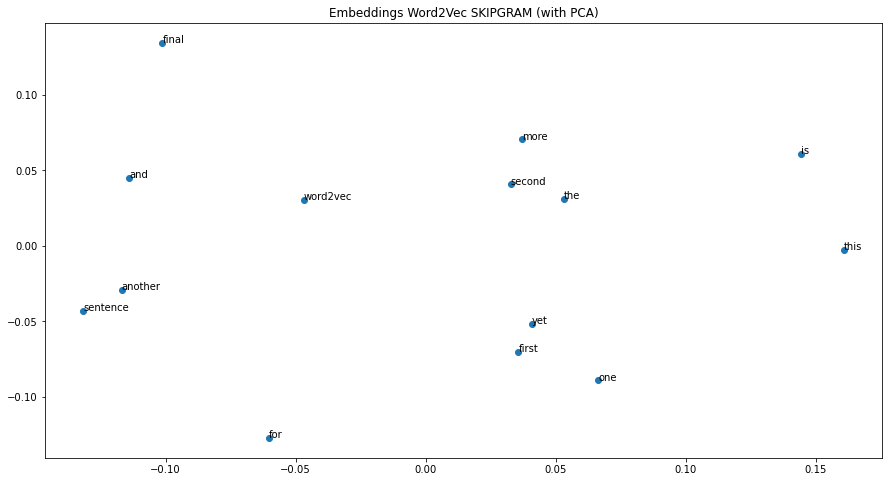

In [13]:
# avec SKIPGRAM
pca = PCA(n_components=2)
embeddings_skipgram_pca = pca.fit_transform(vectors2)

# Tracàge des embeddings réduits en 2 dimensions
plt.figure(figsize=(15, 8))
plt.scatter(embeddings_skipgram_pca[:, 0], embeddings_skipgram_pca[:, 1])
for i, mot in enumerate(words_CBOW):
    plt.annotate(mot, (embeddings_skipgram_pca[i, 0], embeddings_skipgram_pca[i, 1]))
plt.title("Embeddings Word2Vec SKIPGRAM (with PCA)")
plt.show()

In [14]:
corpus = []
with open('eng_news_2020_300K-sentences.txt', 'r', encoding='utf-8') as file:
    for line in file:
        mots = line.strip().split()
        corpus.append(mots)

In [15]:
# Le nouveau modèle Word2Vec avec CBOW
word2vec_modelcbow = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, sg=0)

# Entraîneement un modèle Word2Vec sur le corpus
word2vec_modelcbow.build_vocab(corpus, update=True)
word2vec_modelcbow.train(corpus, total_examples=word2vec_modelcbow.corpus_count, epochs=5)

(7060910, 8510585)

In [16]:
# Le nouveau modèle Word2Vec avec SKIPGRAM
word2vec_modelskipgram = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, sg=1)

# Entraîneement un modèle Word2Vec sur le corpus
word2vec_modelskipgram.build_vocab(corpus, update=True)
word2vec_modelskipgram.train(corpus, total_examples=word2vec_modelskipgram.corpus_count, epochs=5)

(7061255, 8510585)

In [17]:
#Sauvegarder les embeddings pour cbow
word2vec_modelcbow.wv.save_word2vec_format('embeddings_cbow_2020.txt')
#Sauvegarder les embeddings pour skipgram
word2vec_modelcbow.wv.save_word2vec_format('embeddings_skipgram_2020.txt')

In [18]:
# Embedding du mot the avec cbow
embeddingthe1 = word2vec_modelcbow.wv['2020']
print("Embedding du mot 2020 avec cbow: \n",embeddingthe1)

Embedding du mot 2020 avec cbow: 
 [-1.4435745   2.4550383  -0.07836211  1.4850693  -0.27437443 -0.4480658
  0.8611149   1.7167637  -1.3745708   0.47831774  0.2976563   0.93341327
 -0.2916408  -0.23647922 -0.07943607 -1.0201508   1.7175137  -1.0819768
 -1.1831558  -3.9726384  -0.1701204   0.58391756  1.3770503   0.86759776
 -0.12649213 -1.0724121  -3.1983643  -0.04458907 -0.80558294  0.7767814
  1.2649263  -0.6105665  -1.877079   -0.41504624  0.10013568  1.9530504
 -0.9373914   2.0009146   0.5173509  -0.5199951   0.31397974  0.9026467
 -2.2132194  -0.8254443  -0.09413231 -1.9004512  -0.90209097 -0.7981672
 -0.6457992   2.390679    1.2002811   1.8599533  -0.7965644   0.8291905
 -0.35739464  0.042537    0.49135083 -1.4959658  -2.3145728  -1.8221409
  0.779505   -2.6985261   1.1443448  -3.1760905   0.59231114 -0.09682286
  1.3556898  -2.2406626   0.07136609  0.446436   -0.7801519   0.8511801
 -1.2083977   0.13447419 -0.51306397  0.80812836 -1.5748507  -0.21270646
  1.1962934   2.2385824  

In [19]:
# Embedding du mot the avec skipgram
embeddingthe2 = word2vec_modelcbow.wv['2020']
print("Embedding du mot 2020 avec skipgram: \n",embeddingthe2)

Embedding du mot 2020 avec skipgram: 
 [-1.4435745   2.4550383  -0.07836211  1.4850693  -0.27437443 -0.4480658
  0.8611149   1.7167637  -1.3745708   0.47831774  0.2976563   0.93341327
 -0.2916408  -0.23647922 -0.07943607 -1.0201508   1.7175137  -1.0819768
 -1.1831558  -3.9726384  -0.1701204   0.58391756  1.3770503   0.86759776
 -0.12649213 -1.0724121  -3.1983643  -0.04458907 -0.80558294  0.7767814
  1.2649263  -0.6105665  -1.877079   -0.41504624  0.10013568  1.9530504
 -0.9373914   2.0009146   0.5173509  -0.5199951   0.31397974  0.9026467
 -2.2132194  -0.8254443  -0.09413231 -1.9004512  -0.90209097 -0.7981672
 -0.6457992   2.390679    1.2002811   1.8599533  -0.7965644   0.8291905
 -0.35739464  0.042537    0.49135083 -1.4959658  -2.3145728  -1.8221409
  0.779505   -2.6985261   1.1443448  -3.1760905   0.59231114 -0.09682286
  1.3556898  -2.2406626   0.07136609  0.446436   -0.7801519   0.8511801
 -1.2083977   0.13447419 -0.51306397  0.80812836 -1.5748507  -0.21270646
  1.1962934   2.23858

In [20]:
#avec cbow
# Charger les embeddings sauvegardés
embeddings_trump_cbow = KeyedVectors.load_word2vec_format('embeddings_cbow_2020.txt')

# on cherche les mots les plus proches de "Trump"
similar_words = embeddings_trump_cbow.most_similar('Trump', topn=20)

# on affichage les 20 mots similaires
for word, score in similar_words:
    print(f"ce mot est similaire au mot trump: {word}, avec une Similarité  : {score}")

ce mot est similaire au mot trump: Biden, avec une Similarité  : 0.9404473900794983
ce mot est similaire au mot trump: Trump’s, avec une Similarité  : 0.7937441468238831
ce mot est similaire au mot trump: campaign, avec une Similarité  : 0.7922419905662537
ce mot est similaire au mot trump: administration, avec une Similarité  : 0.7733782529830933
ce mot est similaire au mot trump: President, avec une Similarité  : 0.7730288505554199
ce mot est similaire au mot trump: Trump., avec une Similarité  : 0.7614356875419617
ce mot est similaire au mot trump: Donald, avec une Similarité  : 0.7591118216514587
ce mot est similaire au mot trump: Mr., avec une Similarité  : 0.7577267289161682
ce mot est similaire au mot trump: Trump,, avec une Similarité  : 0.7437447309494019
ce mot est similaire au mot trump: president, avec une Similarité  : 0.7313435077667236
ce mot est similaire au mot trump: Trump's, avec une Similarité  : 0.722245454788208
ce mot est similaire au mot trump: 54398, avec une S

In [21]:
#avec skipgram
# Charger les embeddings sauvegardés
embeddings_trump_skipgram = KeyedVectors.load_word2vec_format('embeddings_skipgram_2020.txt')

# on cherche les mots les plus proches de "Trump"
similar_words = embeddings_trump_skipgram.most_similar('Trump', topn=20)

# on affichage les 20 mots similaires
for word, score in similar_words:
    print(f"ce mot est similaire au mot trump: {word}, avec une Similarité  : {score}")

ce mot est similaire au mot trump: Biden, avec une Similarité  : 0.9404473900794983
ce mot est similaire au mot trump: Trump’s, avec une Similarité  : 0.7937441468238831
ce mot est similaire au mot trump: campaign, avec une Similarité  : 0.7922419905662537
ce mot est similaire au mot trump: administration, avec une Similarité  : 0.7733782529830933
ce mot est similaire au mot trump: President, avec une Similarité  : 0.7730288505554199
ce mot est similaire au mot trump: Trump., avec une Similarité  : 0.7614356875419617
ce mot est similaire au mot trump: Donald, avec une Similarité  : 0.7591118216514587
ce mot est similaire au mot trump: Mr., avec une Similarité  : 0.7577267289161682
ce mot est similaire au mot trump: Trump,, avec une Similarité  : 0.7437447309494019
ce mot est similaire au mot trump: president, avec une Similarité  : 0.7313435077667236
ce mot est similaire au mot trump: Trump's, avec une Similarité  : 0.722245454788208
ce mot est similaire au mot trump: 54398, avec une S